In [1]:
#Installing tidyverse and importing libraries
#install.packages("tidyverse")
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
              ####Penguins data Visualization ######
#Work on Palmer penguins dataset
install.packages("palmerpenguins")
library("palmerpenguins")
colnames(penguins)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "species"           "island"            "bill_length_mm"   
[4] "bill_depth_mm"     "flipper_length_mm" "body_mass_g"      
[7] "sex"               "year"

Warning message:
“Using size for a discrete variable is not advised.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


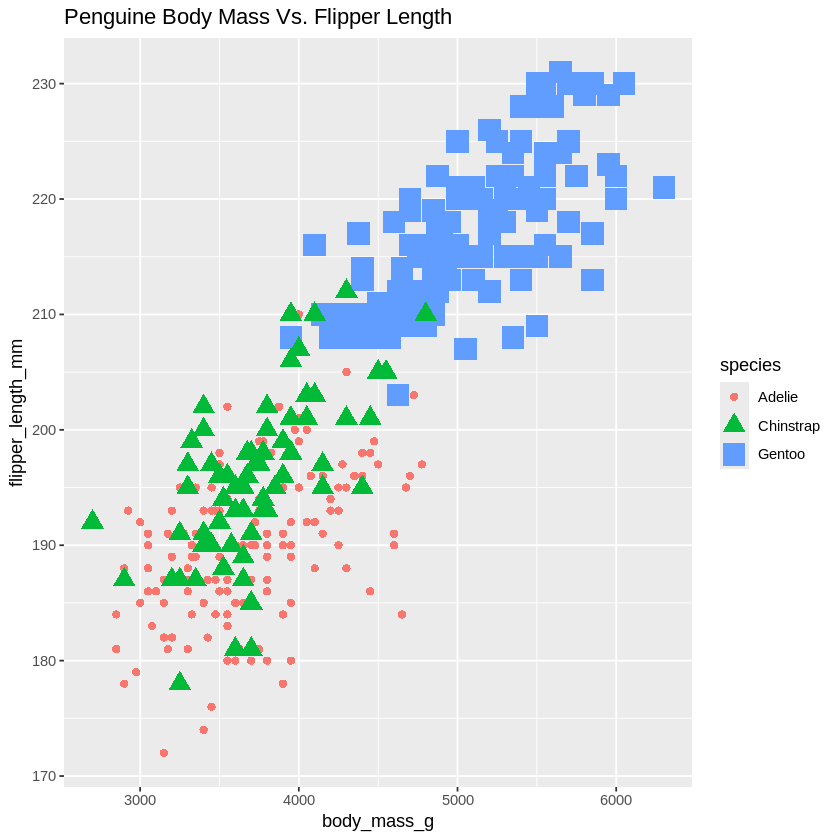

In [3]:
#Color, shape, size, x, y are all tied to variables in the aes()
ggplot(data = penguins) + geom_point(
  aes(
    x = body_mass_g,
    y = flipper_length_mm,
    color = species,
    shape = species,
    size = species
  )
) + ggtitle("Penguine Body Mass Vs. Flipper Length")


In [4]:
#Use function for repeated code (change it if you want other grammar of geometry)
scatterplotting <- function(data, var1, var2, color_var, size_var) {
  if (missing(color_var) && missing(size_var)) {
    ggplot(data) + geom_point(aes(x = var1, y = var2))
  } else if (missing(size_var)) {
    ggplot(data) + geom_point(aes(x = var1, y = var2, colour = color_var))
  } else if (missing(color_var)) {
    ggplot(data) + geom_point(aes(x = var1, y = var2, size = size_var))
  } else{
    ggplot(data) + geom_point(aes(
      x = var1,
      y = var2,
      colour = color_var,
      size = size_var
    ))
  }
}

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


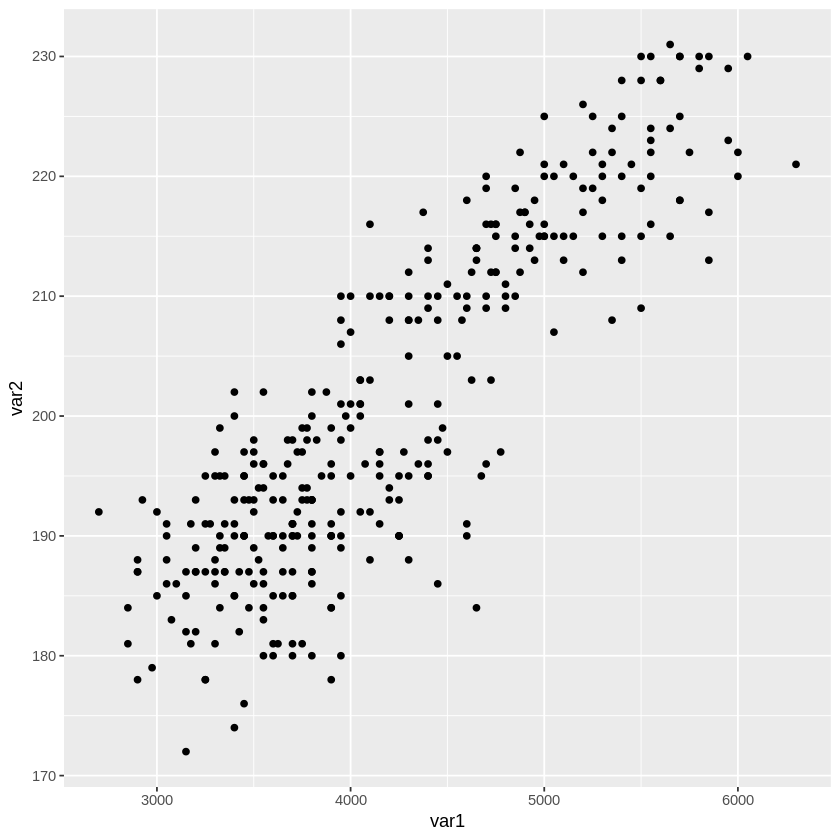

In [5]:
#Must provide data$variable as arguments to function
scatterplotting(penguins, penguins$body_mass_g, penguins$flipper_length_mm) #x,y

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


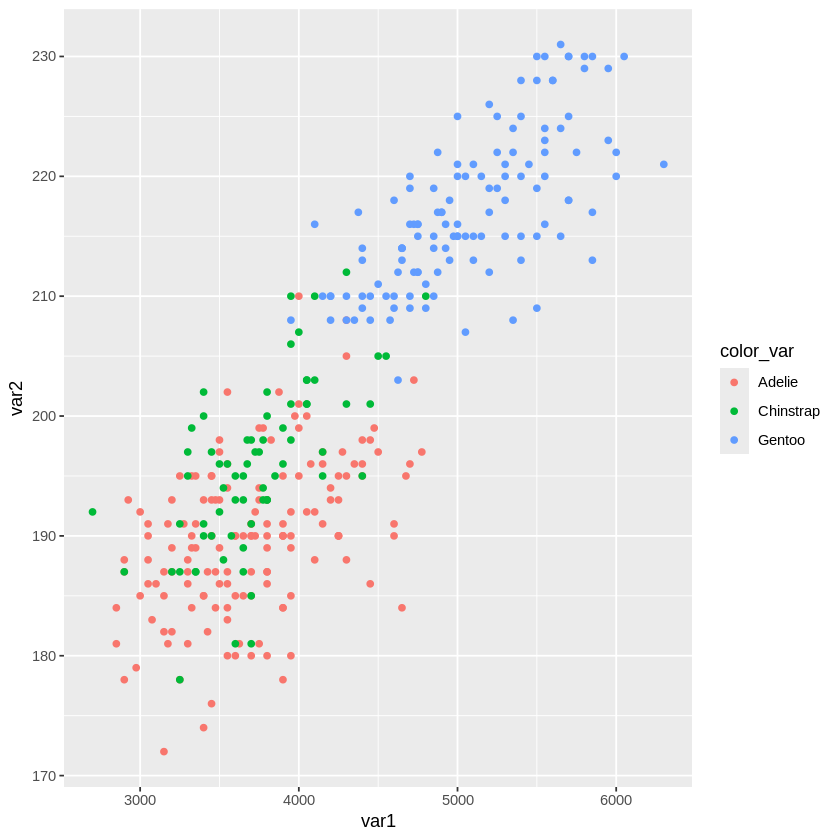

In [6]:
scatterplotting(penguins,
                penguins$body_mass_g,
                penguins$flipper_length_mm,
                penguins$species) #x,y,color

Warning message:
“Using size for a discrete variable is not advised.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


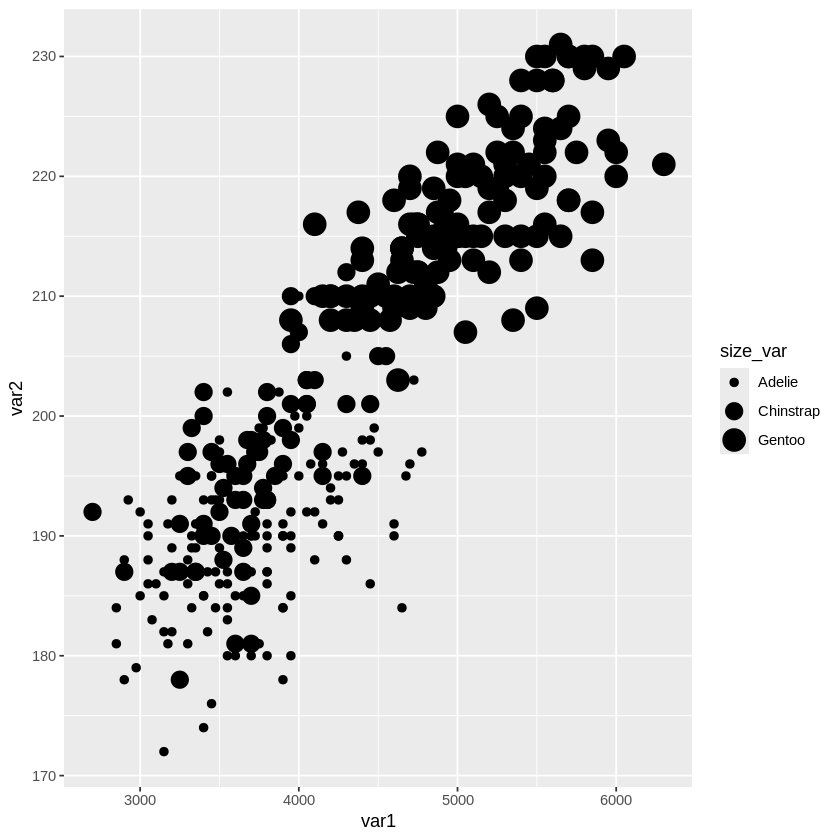

In [7]:
scatterplotting(penguins,
                penguins$body_mass_g,
                penguins$flipper_length_mm,
                ,
                penguins$species) #x,y, , size

Warning message:
“Using size for a discrete variable is not advised.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


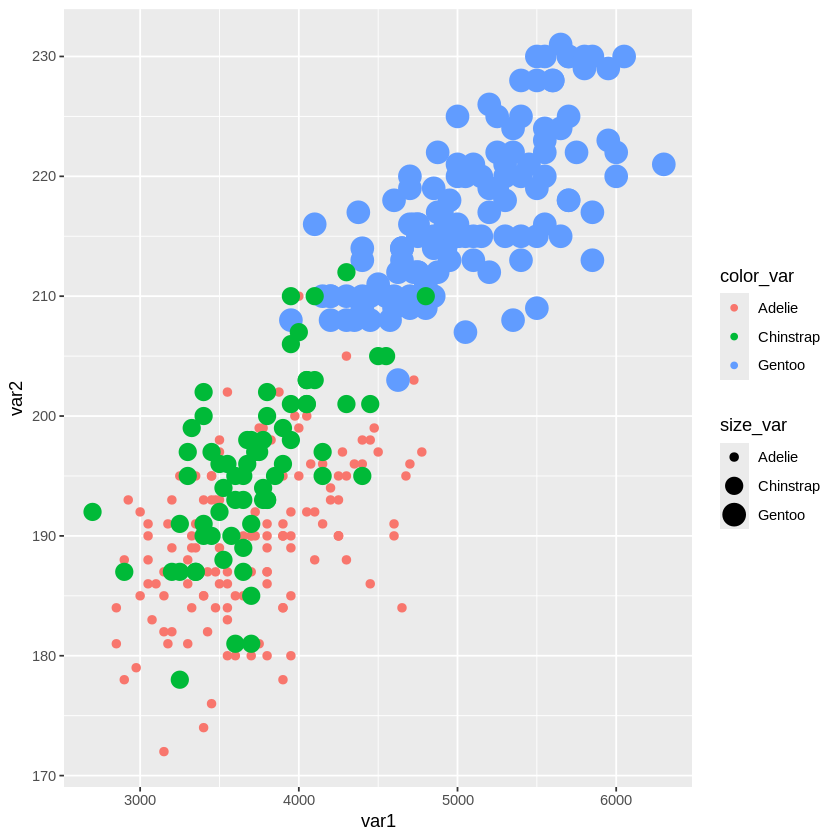

In [8]:
scatterplotting(
  penguins,
  penguins$body_mass_g,
  penguins$flipper_length_mm,
  penguins$species,
  penguins$species
) #x,y,color,size

Warning message:
“Using alpha for a discrete variable is not advised.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


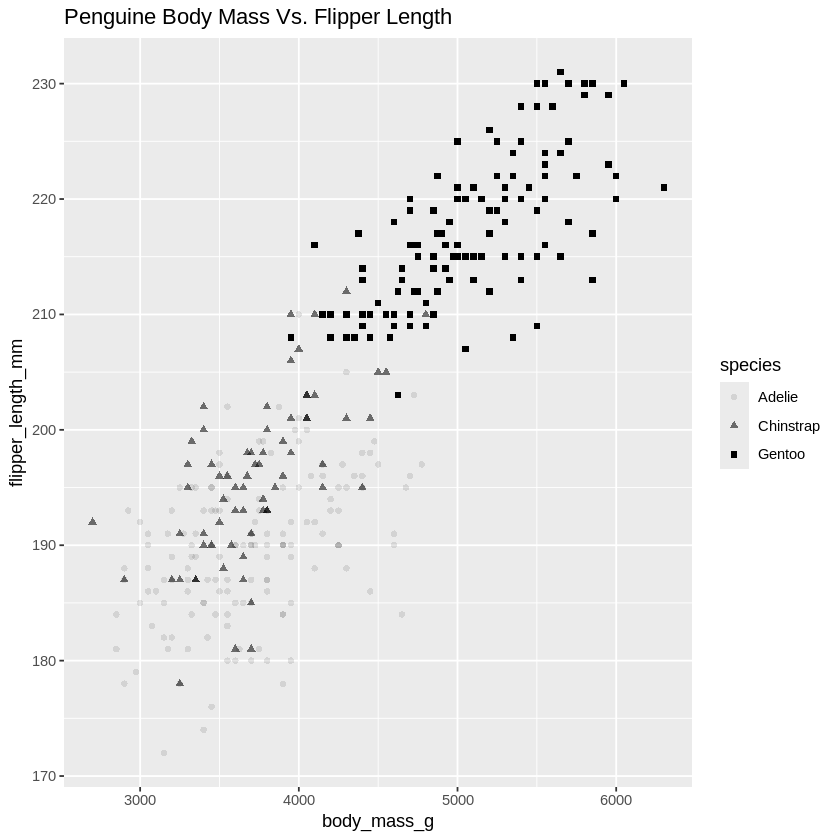

In [9]:
#Adding the alpha aesthetic
ggplot(data = penguins) + geom_point(aes(
  x = body_mass_g,
  y = flipper_length_mm,
  alpha =
    species,
  shape = species
)) + ggtitle("Penguine Body Mass Vs. Flipper Length")

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


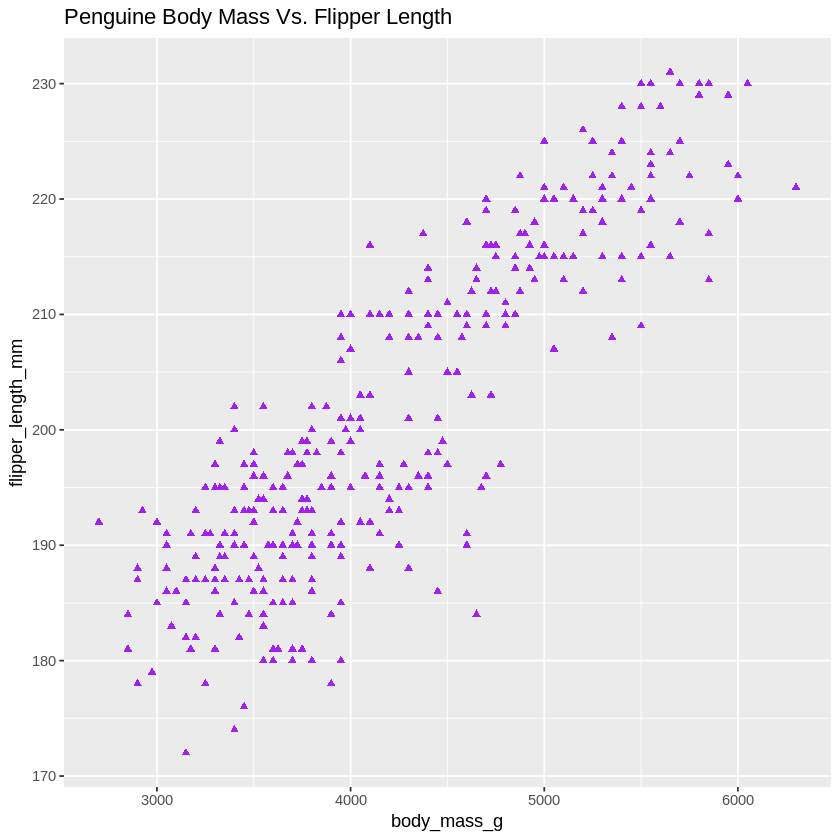

In [10]:
#Specific colors, shapes... that are not tied to variables should be placed outside the aes() but within geom()
ggplot(data = penguins) + geom_point(
  aes(x = body_mass_g, y = flipper_length_mm),
  color = "purple",
  shape = "triangle"
) + ggtitle("Penguine Body Mass Vs. Flipper Length")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”


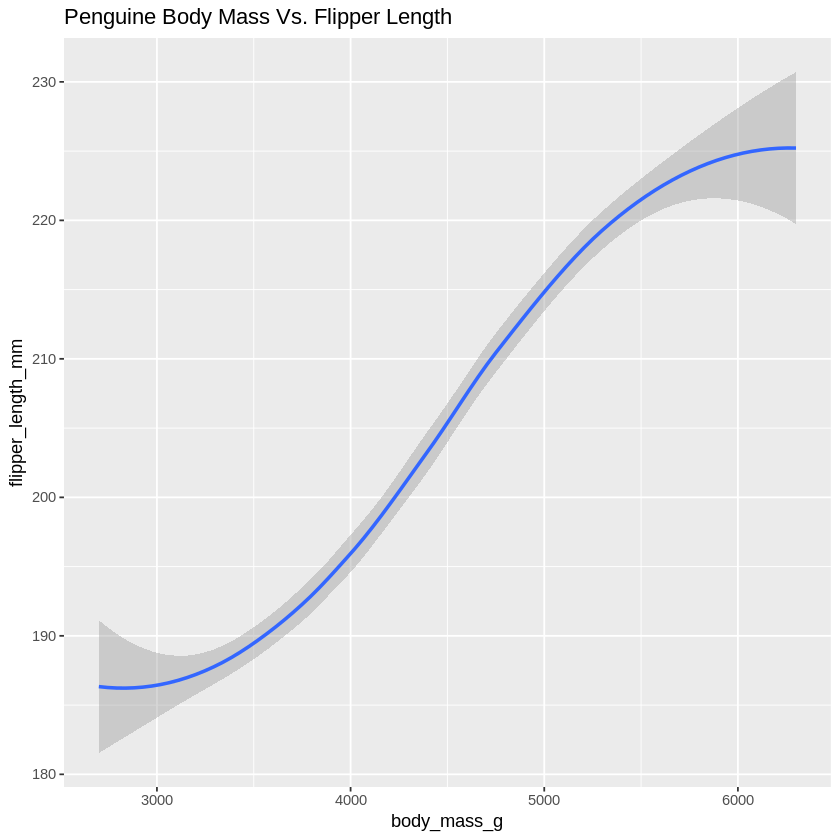

In [11]:
#Using other geometrical object
#Smooth line
ggplot(data = penguins) + geom_smooth(aes(x = body_mass_g, y = flipper_length_mm)) + ggtitle("Penguine Body Mass Vs. Flipper Length")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”


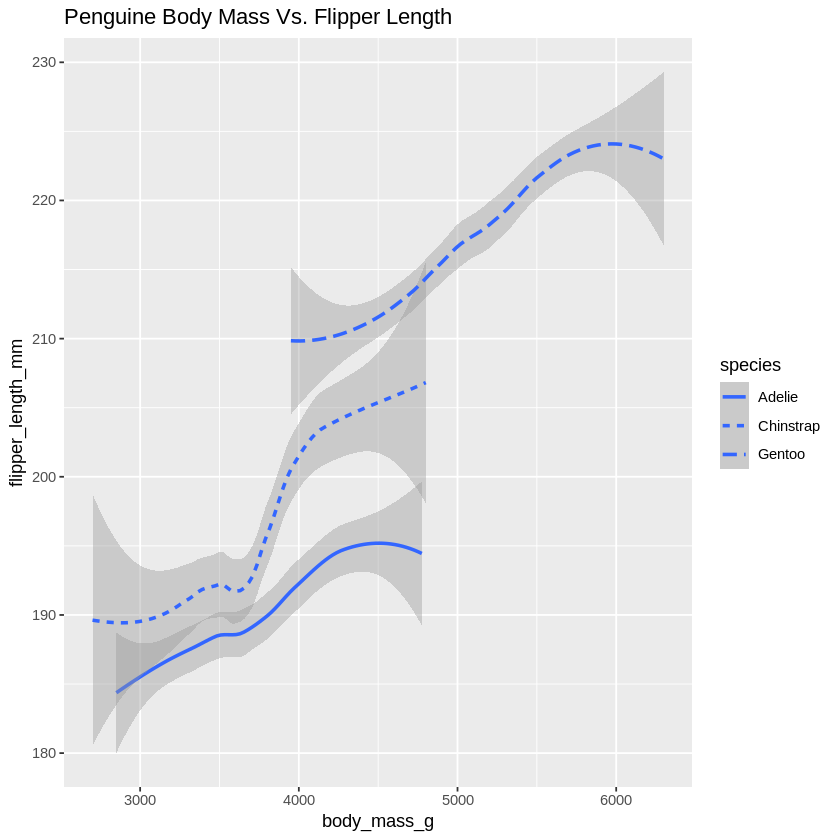

In [12]:
ggplot(data = penguins) + geom_smooth(aes(x = body_mass_g, y = flipper_length_mm, linetype = species)) + ggtitle("Penguine Body Mass Vs. Flipper Length")

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


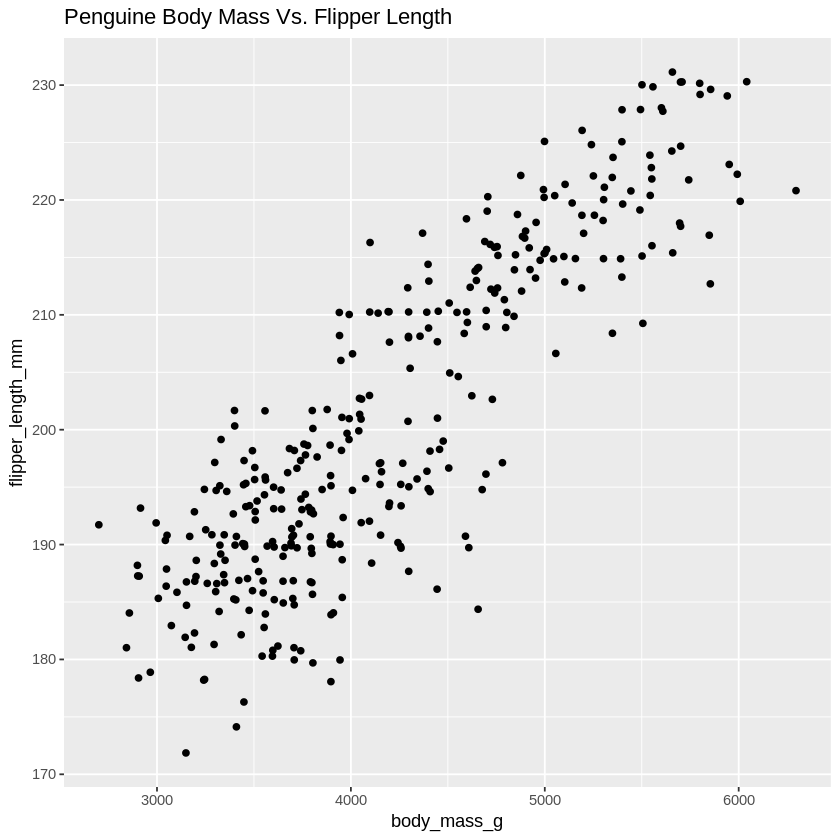

In [13]:
#Jitter for overlapping data points in a plot
ggplot(data = penguins) + geom_jitter(aes(x = body_mass_g, y = flipper_length_mm)) + ggtitle("Penguine Body Mass Vs. Flipper Length")

Combinations of Geom in different layers (best to have aes() in the foundation ggplot() for readability with these combo geometries)
Unless different layers have different aesthetics ex(different alpha, colors, shapes, sizes...)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


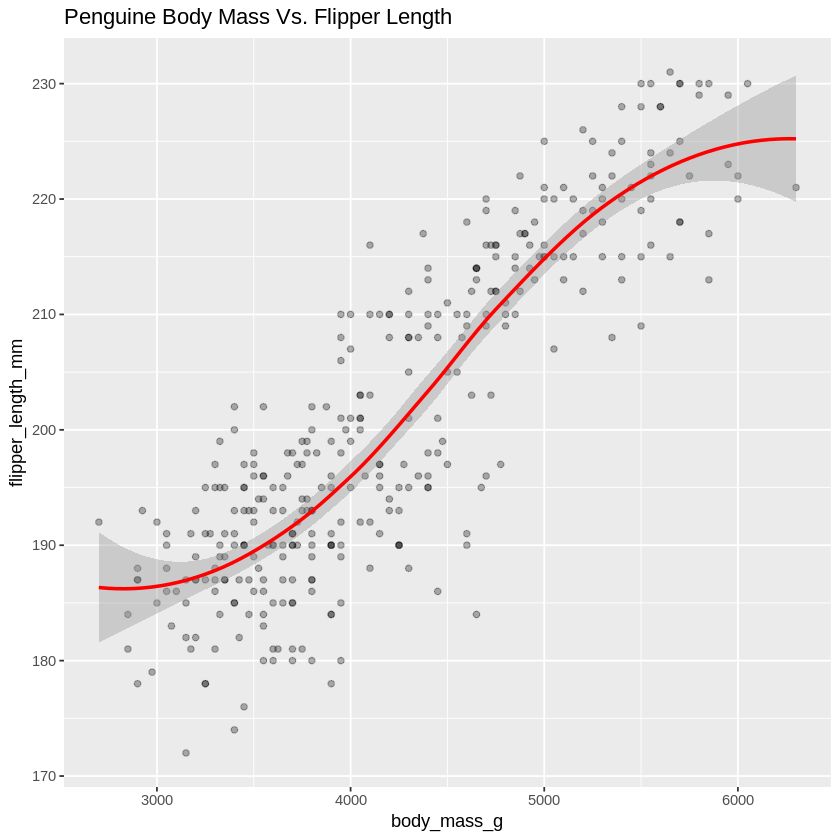

In [14]:
#geom_smooth has two method: "loess" and "gam"; loess for <1000 data points and vice versa
ggplot(data = penguins, aes(x = body_mass_g, y = flipper_length_mm)) + geom_point(alpha = 0.3) + geom_smooth(color =
                                                                                                               "red", method = "loess") + ggtitle("Penguine Body Mass Vs. Flipper Length")

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


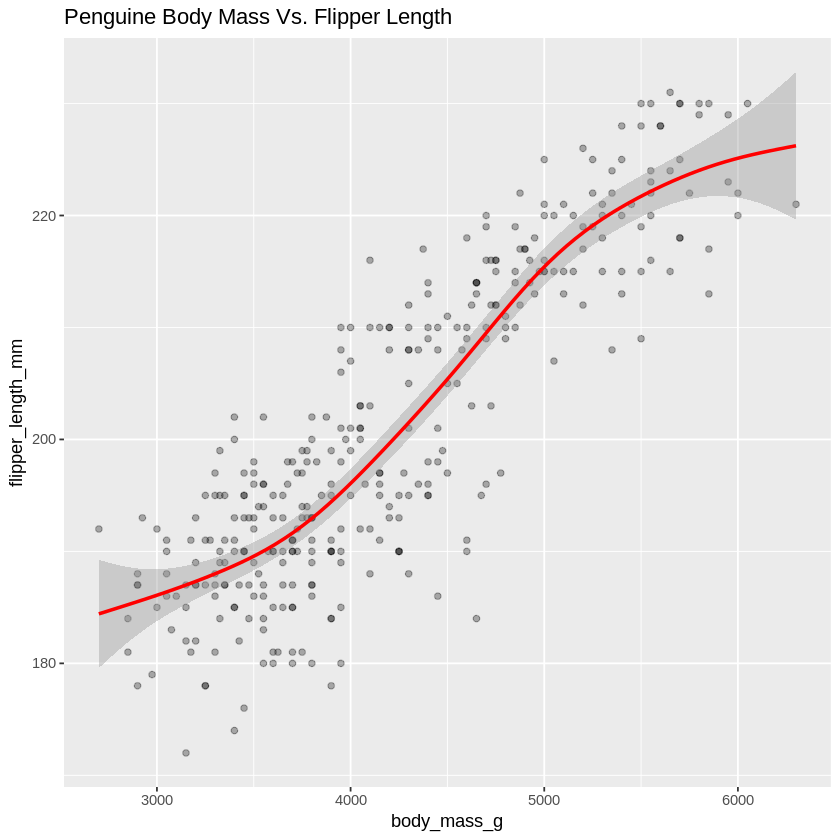

In [15]:
ggplot(data = penguins, aes(x = body_mass_g, y = flipper_length_mm)) + geom_point(alpha = 0.3) + geom_smooth(color =
                                                                                                               "red", method = "gam", formula = y ~s(x)) + ggtitle("Penguine Body Mass Vs. Flipper Length")

In [16]:
                ####Diamonds data Visualization ######
#Already found withtin ggplot2 pkg
colnames(diamonds)
unique(diamonds$cut)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

[1] Ideal     Premium   Good      Very Good Fair     
Levels: Fair < Good < Very Good < Premium < Ideal

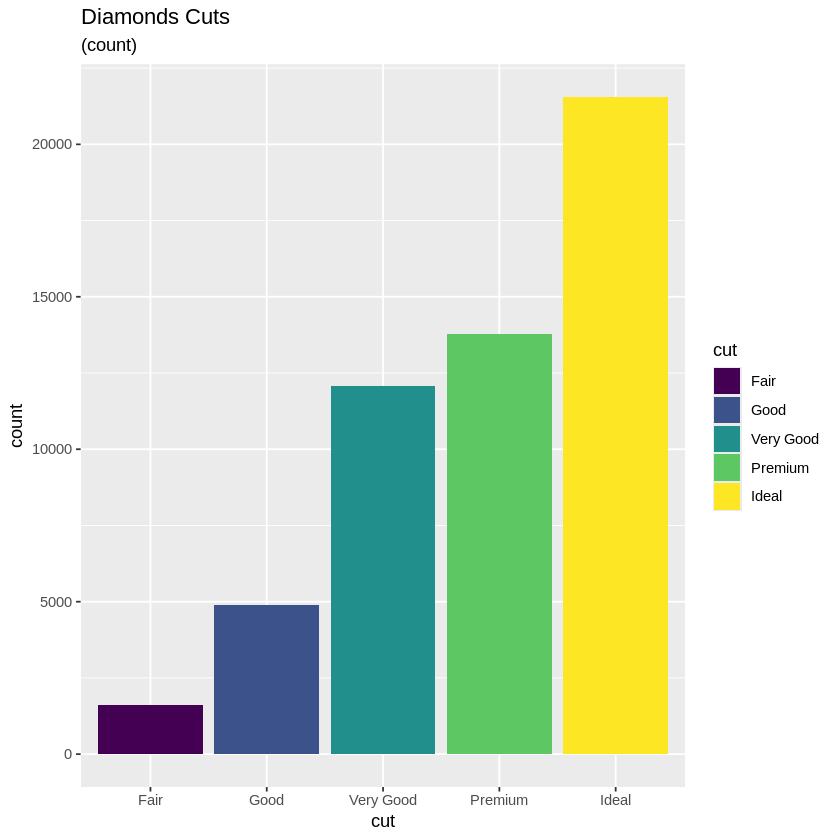

In [18]:
#Bar chart
ggplot(diamonds) + geom_bar(aes(x=cut, fill = cut), stat = "count") + labs(title = "Diamonds Cuts", subtitle = "(count)")

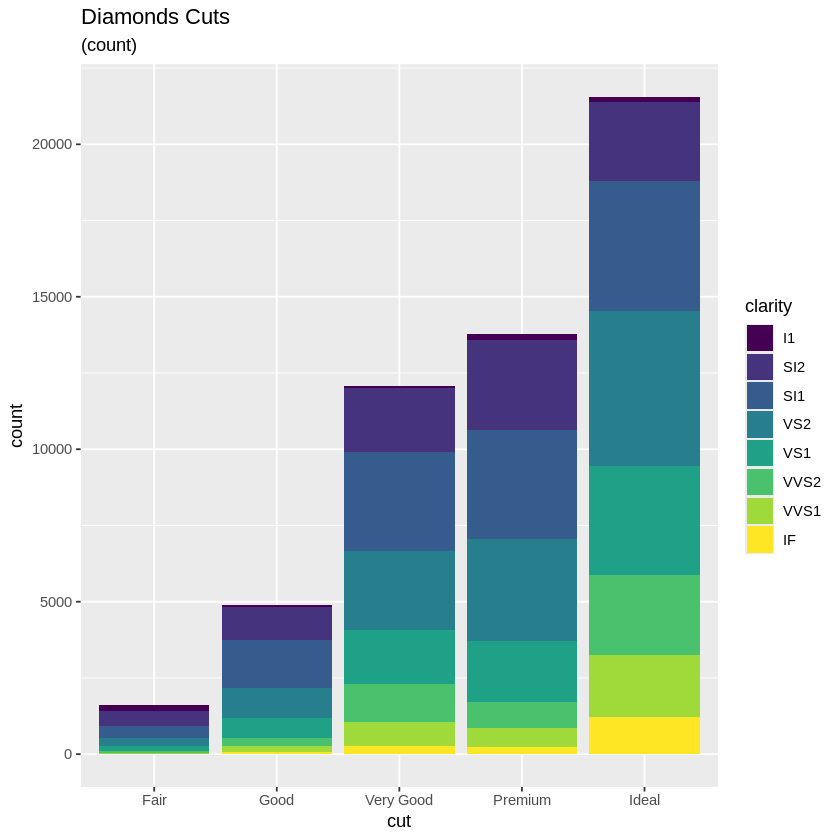

In [19]:
#stacked chart (with a different fill)
ggplot(diamonds) + geom_bar(aes(x=cut, fill = clarity), stat = "count") + labs(title = "Diamonds Cuts", subtitle = "(count)")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




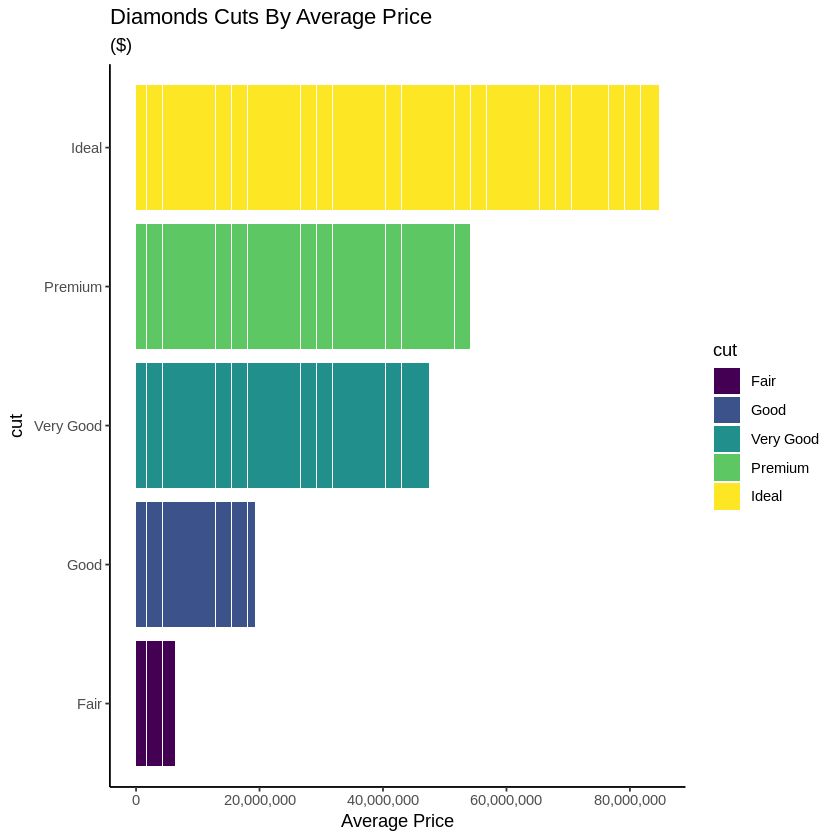

In [20]:
#Need the scales pkg to be able to use label = comma in the scale_y_continuous() layer
install.packages("scales")
library(scales)
#gradiant coloring REQUIRES continuous y axis data
diamonds %>%
  group_by(cut) %>%
  ggplot() + geom_bar(aes(x = cut, y = mean(price), fill = cut), stat = "identity") + scale_y_continuous(labels = comma) + coord_flip() +
  theme_classic() + labs(title = "Diamonds Cuts By Average Price",
                         subtitle = "($)",
                         y = "Average Price")